In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils.udp_util import extract_udp_prague_to_dataframe
from utils.plotter import  plot_matplotlib_graph
from utils.util import extract_iperf3_data_df, find_files_by_folder
from datetime import datetime

In [2]:
import os



# Usage example
root_folder = "../data"
file_extensions = [".json"]  # Add whatever extensions you want

files_dict = find_files_by_folder(root_folder, file_extensions)
print(files_dict)


{'udp_net_2025-08-07-14-15-15_baseline': ['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-15-15_baseline\\iperf3_client_cubic_iperf3_d120.json', 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-15-15_baseline\\iperf3_server_cubic_iperf3_d120.json', 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-15-15_baseline\\udp_prague_receiver_iperf3_d120.json'], 'udp_net_2025-08-07-14-18-07_best': ['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-18-07_best\\iperf3_client_cubic_iperf3_d120.json', 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-18-07_best\\iperf3_server_cubic_iperf3_d120.json', 'c:\\Users\\deols\\OneDrive\\Documents\\Git

In [3]:
files_dict.keys()

dict_keys(['udp_net_2025-08-07-14-15-15_baseline', 'udp_net_2025-08-07-14-18-07_best', 'udp_net_2025-08-07-14-21-30_baseline', 'udp_net_2025-08-07-14-51-01_best', 'udp_net_2025-08-07-15-27-19_baseline'])

In [4]:
from utils.util import create_directory_if_not_exists
import os
graph_directory = os.path.join("./", "Graphs")
create_directory_if_not_exists(graph_directory)

Directory already exists: ./Graphs


In [5]:
def extract_latest_by_type(files_dict):
    best = None
    best_time = None
    baseline = None
    baseline_time = None

    for key in files_dict:
        # Extract timestamp and type
        *_, timestamp_str, tag = key.split('_')
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d-%H-%M-%S")

        if tag == 'best' and (best_time is None or timestamp > best_time):
            best_time = timestamp
            best = key
        elif tag == 'baseline' and (baseline_time is None or timestamp > baseline_time):
            baseline_time = timestamp
            baseline = key

    return {
        'DRL_allocation': files_dict[best] if best else {},
        'Random_allocation': files_dict[baseline] if baseline else {}
    }

# Usage
latest_folders = extract_latest_by_type(files_dict)

In [6]:
latest_folders

{'DRL_allocation': ['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\iperf3_client_cubic_iperf3_d1800.json',
  'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\iperf3_server_cubic_iperf3_d1800.json',
  'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\udp_prague_receiver_iperf3_d1800.json'],
 'Random_allocation': ['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-15-27-19_baseline\\iperf3_client_cubic_iperf3_d1800.json',
  'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-15-27-19_baseline\\iperf3_server_cubic_iperf3_d1800.json',
  'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatL

In [7]:
latest_folders['DRL_allocation']

['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\iperf3_client_cubic_iperf3_d1800.json',
 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\iperf3_server_cubic_iperf3_d1800.json',
 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-14-51-01_best\\udp_prague_receiver_iperf3_d1800.json']

In [8]:
latest_folders['Random_allocation']

['c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-15-27-19_baseline\\iperf3_client_cubic_iperf3_d1800.json',
 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-15-27-19_baseline\\iperf3_server_cubic_iperf3_d1800.json',
 'c:\\Users\\deols\\OneDrive\\Documents\\Github\\Networking\\UbuntuSatLab\\Sat Testing Script\\data\\udp_net_2025-08-07-15-27-19_baseline\\udp_prague_receiver_iperf3_d1800.json']

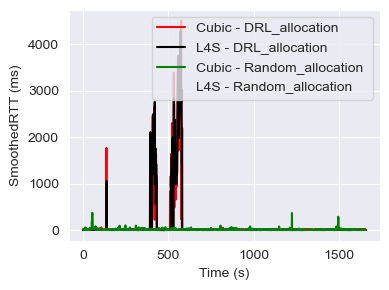

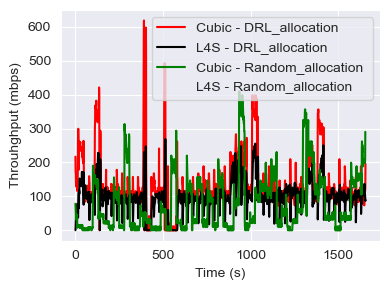

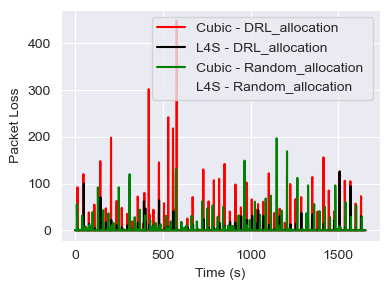

In [9]:
paths = {
    "Cubic - DRL_allocation ":extract_iperf3_data_df(latest_folders['DRL_allocation'][0]),
    "L4S - DRL_allocation ":extract_udp_prague_to_dataframe(latest_folders['DRL_allocation'][2]),
    "Cubic - Random_allocation ":extract_iperf3_data_df(latest_folders['Random_allocation'][0]),
    "L4S - Random_allocation ":extract_udp_prague_to_dataframe(latest_folders['Random_allocation'][2]),
}


scenario = str("RTT_UDPPraguevsCubic")
plot_matplotlib_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}',
                graph_directory=graph_directory,
)

scenario = str("Thrpt_UDPPraguevsCubic")
plot_matplotlib_graph(paths=paths,
                ycolumn="thrpt",
                title=f"{scenario} Throuhghput",
                xlabel="Time (s)",
                ylabel="Throuhghput (mbps)",
                filename=f'{scenario}',
                graph_directory=graph_directory,
)


scenario = str("PktLoss_UDPPraguevsCubic")
plot_matplotlib_graph(paths=paths,
                ycolumn="Lost_Packets",
                title=f"{scenario} Packet Loss",
                xlabel="Time (s)",
                ylabel="Packet Loss",
                filename=f'{scenario}',
                graph_directory=graph_directory,
)

In [10]:
# for folder_name, files in files_dict.items():
#     print(f"Folder: {folder_name}")
#     # for file in files:
#     #     print(f"  - {file}")

#     file_udp = files[2]
#     file_cubic = files[0]

#     # print("file_cubic",file_cubic)
#     # print("file_udp",file_udp)
#     tfcubic = extract_iperf3_data_df(file_cubic)
#     utf = extract_udp_prague_to_dataframe(file_udp)





#     # Define paths
#     paths = {
#         "Cubic": tfcubic,
#         "L4S": utf,
#         # "Bandwidth": baseline_throuhgput_df
#     }

    


#     scenario = str("RTT_UDPPraguevsCubic")
#     plot_matplotlib_graph(paths=paths,
#                     ycolumn="SmoothedRTT",
#                     title=f"{scenario} SmoothedRTT",
#                     xlabel="Time (s)",
#                     ylabel="SmoothedRTT (ms)",
#                     filename=f'{scenario}',
#                     graph_directory=graph_directory,
#     )

#     scenario = str("Thrpt_UDPPraguevsCubic")
#     plot_matplotlib_graph(paths=paths,
#                     ycolumn="thrpt",
#                     title=f"{scenario} Throuhghput",
#                     xlabel="Time (s)",
#                     ylabel="Throuhghput (mbps)",
#                     filename=f'{scenario}',
#                     graph_directory=graph_directory,
#     )


#     scenario = str("PktLoss_UDPPraguevsCubic")
#     plot_matplotlib_graph(paths=paths,
#                     ycolumn="Lost_Packets",
#                     title=f"{scenario} Packet Loss",
#                     xlabel="Time (s)",
#                     ylabel="Packet Loss",
#                     filename=f'{scenario}',
#                     graph_directory=graph_directory,
#     )

